# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Basic Data Exploratiom

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().mean()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [6]:
df = df.drop(['Ticket', 'Cabin'], axis=1)

In [7]:
df = df.drop(['Name', 'PassengerId'], axis=1)

In [8]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Handling Missing Values

In [9]:
df.dropna(subset=['Embarked'], inplace=True)

In [10]:
df.shape

(889, 8)

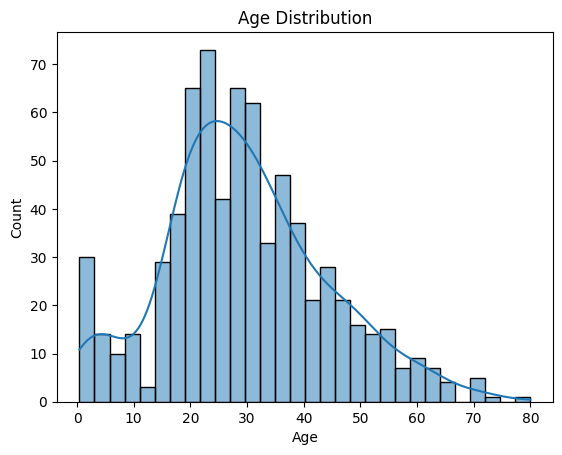

In [11]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

In [12]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [13]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [14]:
df['Age'] = df['Age'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


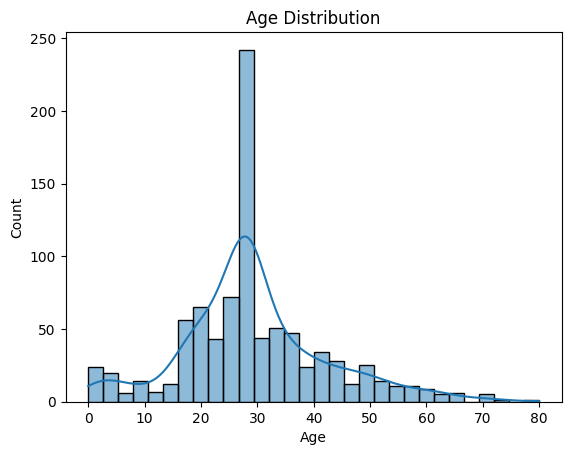

In [16]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# EDA

In [17]:
#combining both columd
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22,1,0,7.2500,S,2
1,1,1,female,38,1,0,71.2833,C,2
2,1,3,female,26,0,0,7.9250,S,1
3,1,1,female,35,1,0,53.1000,S,2
4,0,3,male,35,0,0,8.0500,S,1


In [19]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.300935


In [20]:
df = df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22,7.2500,S,0
1,1,1,female,38,71.2833,C,0
2,1,3,female,26,7.9250,S,1
3,1,1,female,35,53.1000,S,0
4,0,3,male,35,8.0500,S,1


In [22]:
df['AgeBand'] = pd.cut(df['Age'], bins=[0, 16, 32, 48, 64, 100], labels=[0, 1, 2, 3, 4])

In [23]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,AgeBand
0,0,3,male,22,7.2500,S,0,1
1,1,1,female,38,71.2833,C,0,2
2,1,3,female,26,7.9250,S,1,1
3,1,1,female,35,53.1000,S,0,2
4,0,3,male,35,8.0500,S,1,2


In [24]:
df = df.drop(['Age'], axis=1)

In [25]:
df.head()

,Survived,Pclass,Sex,Fare,Embarked,IsAlone,AgeBand
0,0,3,male,7.2500,S,0,1
1,1,1,female,71.2833,C,0,2
2,1,3,female,7.9250,S,1,1
3,1,1,female,53.1000,S,0,2
4,0,3,male,8.0500,S,1,2


In [26]:
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [27]:
bins = [0, 7.91, 14.45, 31, 1000]  # Custom Fare Ranges
labels = [0, 1, 2, 3]  # Numeric labels for ML

df['FareBand'] = pd.cut(df['Fare'], bins=bins, labels=labels)

In [28]:
df.head()

,Survived,Pclass,Sex,Fare,Embarked,IsAlone,AgeBand,FareBand
0,0,3,male,7.2500,0,0,1,0
1,1,1,female,71.2833,1,0,2,3
2,1,3,female,7.9250,0,1,1,1
3,1,1,female,53.1000,0,0,2,3
4,0,3,male,8.0500,0,1,2,1


In [29]:
df = df.drop(['Fare'], axis=1)

In [30]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [31]:
df.head()

,Survived,Pclass,Sex,Embarked,IsAlone,AgeBand,FareBand
0,0,3,0,0,0,1,0
1,1,1,1,1,0,2,3
2,1,3,1,0,1,1,1
3,1,1,1,0,0,2,3
4,0,3,0,0,1,2,1


In [32]:
X = df.drop("Survived", axis=1)  # Features
y = df["Survived"]  # Target variable

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.61
Confusion Matrix:
 [[97 12]
 [57 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.89      0.74       109
           1       0.50      0.17      0.26        69

    accuracy                           0.61       178
   macro avg       0.56      0.53      0.50       178
weighted avg       0.58      0.61      0.55       178



In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)

In [39]:
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy after Scaling: {accuracy_scaled:.2f}")

Accuracy after Scaling: 0.79
